In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import matplotlib.pyplot as plt


hotels = pd.read_csv('../input/hotels/hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [2]:
print(hotels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 


**Обратботка даты**

****

In [3]:
hotels['days_since_review'] = hotels['days_since_review'].apply(lambda x: x.split()[0]).astype('int')

hotels['review_date'] = pd.to_datetime(hotels['review_date'])  
hotels['review_date_month'] = hotels['review_date'].dt.month.astype(int)

**Обработка тегов**

In [4]:
unique_dic = {}
def make_unique_dic(x):
    x = x[3:-3].split(" ', ' ")
    for elem in x:
        if elem in unique_dic:
            unique_dic[elem] = unique_dic[elem] + 1
        else:
            unique_dic[elem] = 1
    return x

hotels['tags'].apply(make_unique_dic)
unique_tags = pd.DataFrame(unique_dic, index=['count']).transpose()
unique_tags

,count
Leisure trip,313593
Couple,189212
Studio Suite,543
Stayed 2 nights,100263
Submitted from a mobile device,230778
...,...
Special Offer Double or Twin Room with Parking,1
Westminster Suite with King Bed,1
Quadruple Room 2 Adults 2 Children,1
Art Deco Room Terrace,1


In [5]:
unique_list=unique_tags.nlargest(20,'count').index.values.tolist()
unique_list

['Leisure trip',
 'Submitted from a mobile device',
 'Couple',
 'Stayed 1 night',
 'Stayed 2 nights',
 'Solo traveler',
 'Stayed 3 nights',
 'Business trip',
 'Group',
 'Family with young children',
 'Stayed 4 nights',
 'Double Room',
 'Standard Double Room',
 'Superior Double Room',
 'Family with older children',
 'Deluxe Double Room',
 'Double or Twin Room',
 'Stayed 5 nights',
 'Standard Double or Twin Room',
 'Classic Double Room']

**Добавляем признаки 20 самых популярных тегов**

In [6]:
for tag in unique_list:
    hotels[tag] = hotels['tags'].apply(lambda x: 1 if tag in x else 0)
hotels

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,Stayed 4 nights,Double Room,Standard Double Room,Superior Double Room,Family with older children,Deluxe Double Room,Double or Twin Room,Stayed 5 nights,Standard Double or Twin Room,Classic Double Room
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,0,0,0,0,0,0,0,0,0,0
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,0,1,1,0,0,0,0,0,0,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,0,1,0,0,0,0,0,0,0,0
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,0,0,0,0,0,0,0,0,0,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,107,2017-04-19,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,...,0,0,0,0,0,0,1,0,0,0
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2017-02-13,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,1,1,1,0,0,0,0,0,0,0
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2016-02-07,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,0,0,0,0,0,0,0,0,0,0
386801,31 Great Cumberland Place Westminster Borough ...,365,2017-05-21,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,0,1,0,0,0,1,0,0,0,0


In [7]:
hotels=hotels.drop('tags',axis=1)

**Обработка городов и Стран**

In [8]:
hotels = hotels.fillna(0)

In [9]:
hotels['city']=hotels['hotel_address'].apply(lambda x: x.split(' ')[-2])
hotels['city'] = hotels['city'].apply(lambda x: 'London' if x == 'United' else x)


hotels['country']=hotels['hotel_address'].apply(lambda x: x.split(' ')[-1])
hotels['country'] = hotels['country'].apply(lambda x: 'United Kingdom' if x == 'Kingdom' else x)

**Заполнение пустых значений географической широты и долготы**

In [10]:
import numpy as np
clean_lng=np.unique(hotels[hotels['lng']==0]['city'].values)
clean_lat=np.unique(hotels[hotels['lat']==0]['city'].values)
print(clean_lng)
print(clean_lat)
print(hotels['city'].unique())

['Barcelona' 'Paris' 'Vienna']
['Barcelona' 'Paris' 'Vienna']
['London' 'Paris' 'Amsterdam' 'Milan' 'Vienna' 'Barcelona']


In [11]:
def fill_clean_lat(elem):
    if elem[1]=='Barcelona' and elem[0]==0:
        return 41.38879
    elif elem[1]=='Paris' and elem[0]==0:
        return 48.85341
    elif elem[1]=='Vienna' and elem[0]==0:
        return 48.20849
    else:
        return elem[0]

hotels['lat']=hotels[['lat','city']].apply(fill_clean_lat,axis=1)


In [12]:
def fill_clean_lng(elem):
    if elem[1]=='Barcelona' and elem[0]==0:
        return 2.15899
    elif elem[1]=='Paris' and elem[0]==0:
        return 2.3488
    elif elem[1]=='Vienna' and elem[0]==0:
        return 16.37208
    else:
        return elem[0]
    
hotels['lng']=hotels[['lng','city']].apply(fill_clean_lng,axis=1)


**Кодирование самых популярных национальностей рецензентов**

In [13]:
nationalities_list=hotels['reviewer_nationality'].value_counts().nlargest(10).index
hotels['reviewer_nationality']=hotels['reviewer_nationality'].apply(lambda x: x if x in nationalities_list else 'Other')

In [14]:
import category_encoders as ce 

encoder = ce.OneHotEncoder(cols=['reviewer_nationality']) #
type_bin = encoder.fit_transform(hotels['reviewer_nationality'])
hotels = pd.concat([hotels, type_bin], axis=1)

In [15]:
hotels=hotels.drop(['reviewer_nationality'], axis=1)

**Коэффициент позитивности комментария на основе количества положительных и негативных комментариев**

In [16]:
hotels['positivity_coefficient']=(hotels['review_total_positive_word_counts']-hotels['review_total_negative_word_counts'])/((hotels['review_total_positive_word_counts']+hotels['review_total_negative_word_counts']))

In [17]:
hotels=hotels.fillna(0)

In [18]:
object_columns = [x for x in hotels.columns if hotels[x].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)
hotels.drop('review_date', axis = 1, inplace=True)


**Мультиколлинеарность**

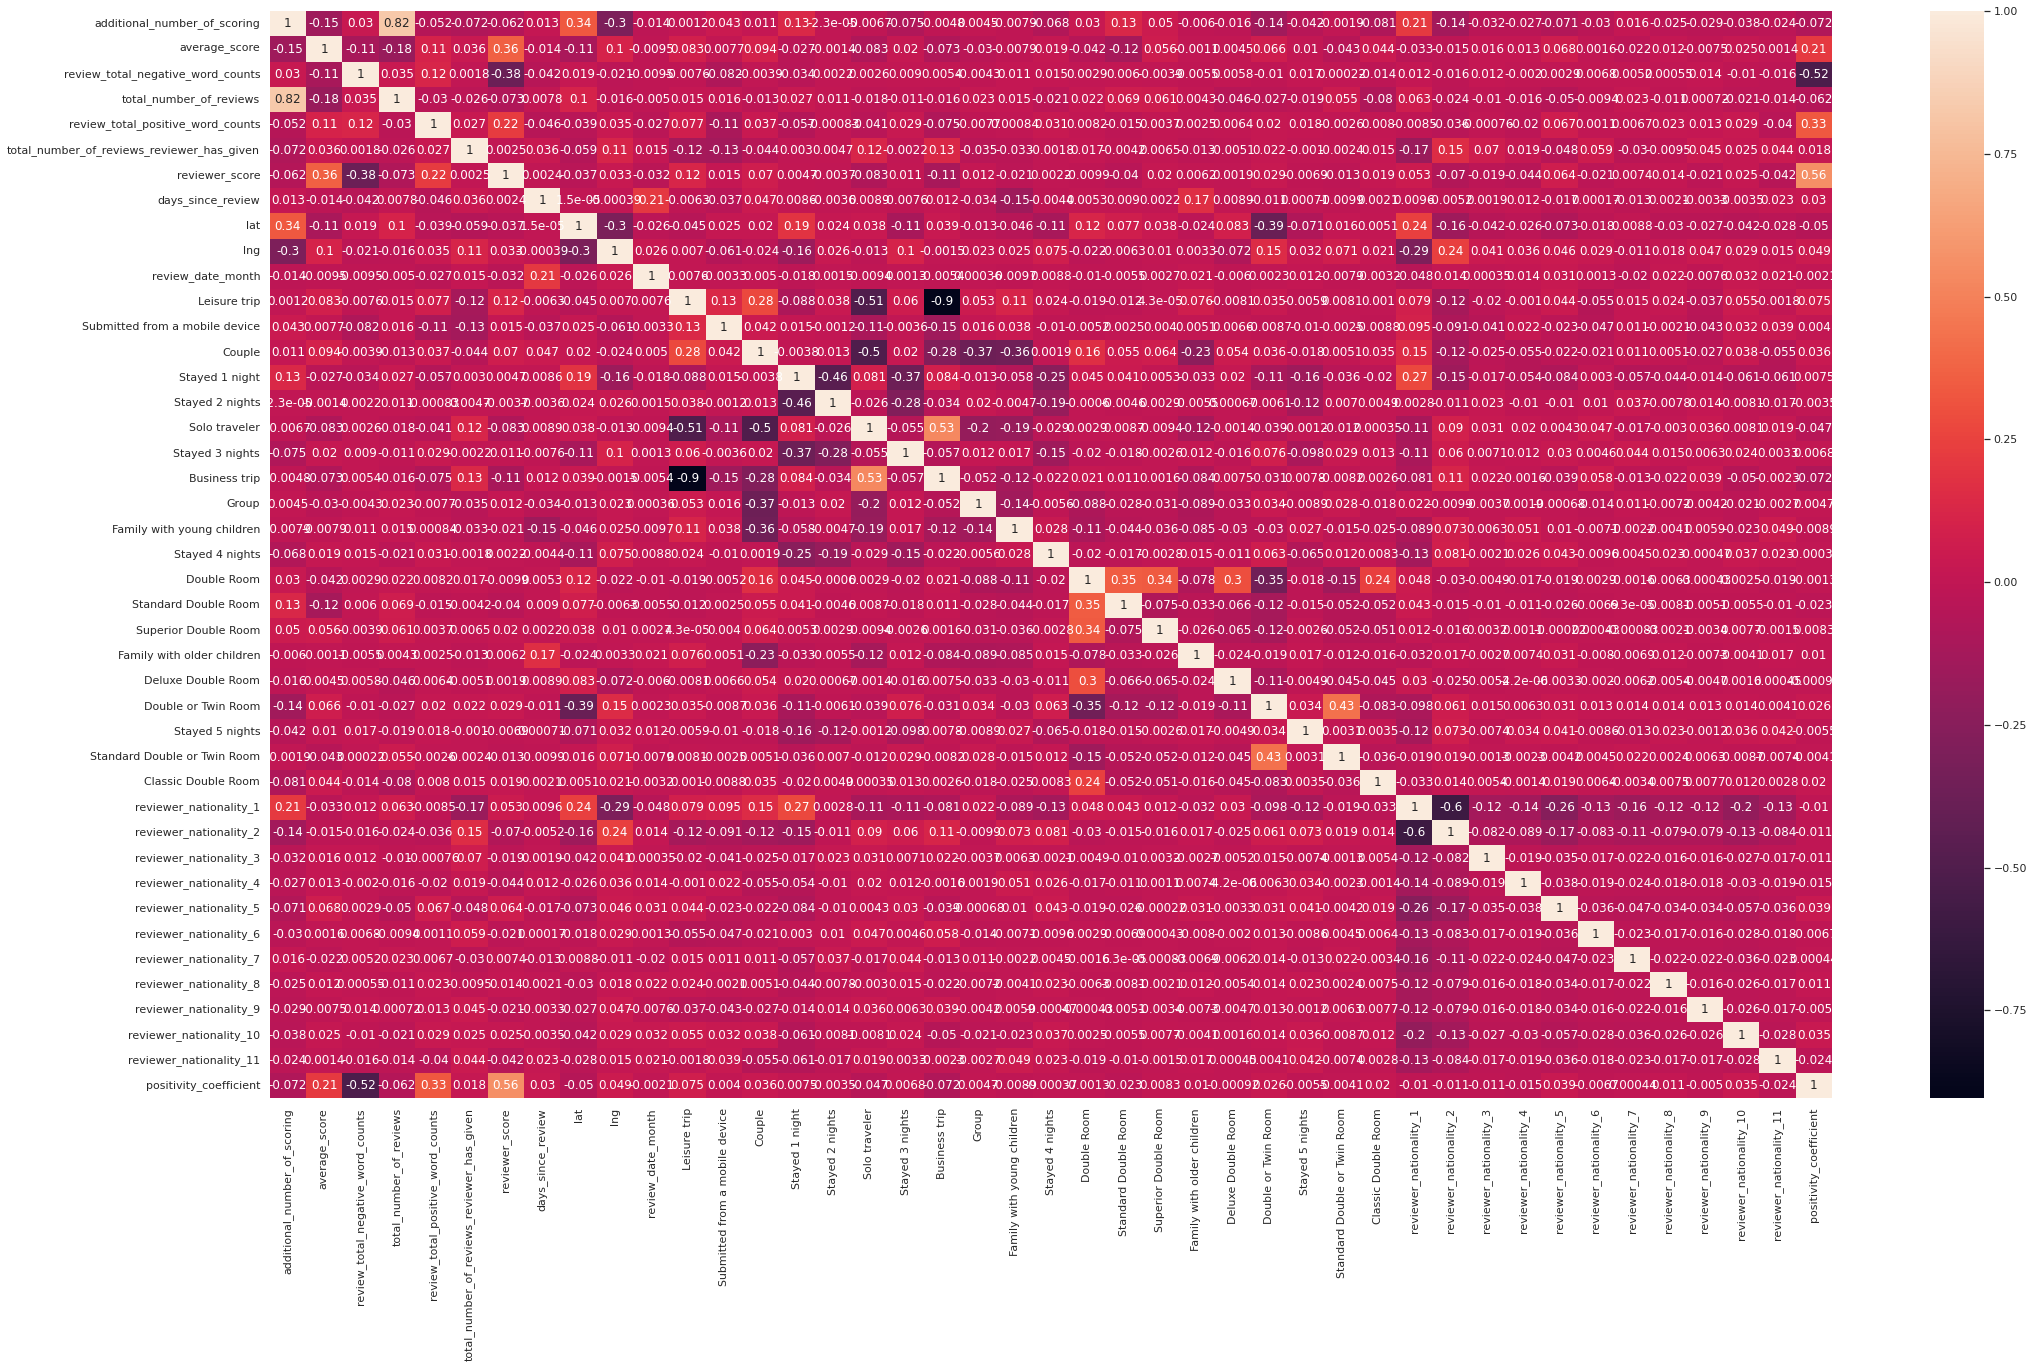

In [19]:
import seaborn as sns 
sns.set(rc = {'figure.figsize':(35,20)})
p=sns.heatmap(hotels.corr(), annot=True) 

> Из графика видим, что есть две пары сильно коррелирующих признаков

In [20]:
hotels.drop(['additional_number_of_scoring','Leisure trip'],axis=1)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,review_date_month,...,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7,reviewer_nationality_8,reviewer_nationality_9,reviewer_nationality_10,reviewer_nationality_11,positivity_coefficient
0,8.4,3,1994,4,7,10.0,531,51.507894,-0.143671,2,...,0,0,0,0,0,0,0,0,0,0.142857
1,8.3,3,1361,2,14,6.3,203,51.521009,-0.123097,1,...,0,0,0,0,0,0,0,0,0,-0.200000
2,8.9,6,406,0,14,7.5,289,48.845377,2.325643,10,...,0,0,0,0,0,0,0,0,0,-1.000000
3,7.5,0,607,11,8,10.0,681,48.888697,2.394540,9,...,0,0,0,0,0,0,0,0,0,1.000000
4,8.5,4,7586,20,10,9.6,516,52.385601,4.847060,3,...,0,0,0,0,0,0,0,0,0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,9.0,0,617,10,10,8.8,106,51.494028,-0.191050,4,...,0,0,0,0,0,0,0,0,0,1.000000
386799,8.4,0,3224,93,1,9.2,171,48.192379,16.399451,2,...,0,0,0,0,0,0,0,0,0,1.000000
386800,6.8,12,2751,9,21,8.3,543,51.520795,-0.131084,2,...,0,0,0,1,0,0,0,0,0,-0.142857
386801,8.1,0,1567,6,28,9.2,74,51.515125,-0.160066,5,...,0,1,0,0,0,0,0,0,0,1.000000


<AxesSubplot:title={'center':'Распределения признака total_number_of_reviews'}, xlabel='total_number_of_reviews', ylabel='Density'>

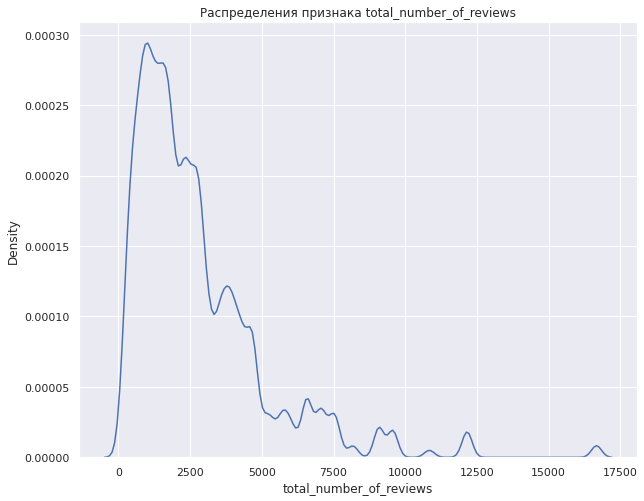

In [21]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения признака total_number_of_reviews')
sns.kdeplot(hotels['total_number_of_reviews'], ax=ax1)

Распределение похоже на экспоненциальное. Видно много, так сказать, пеньков в "хвосте" распределения. Нормализуем признак с помощью RobustScaler

In [22]:
from sklearn import preprocessing

r_scaler = preprocessing.RobustScaler()

tmp_df=pd.DataFrame(hotels['total_number_of_reviews'])
tmp_df = r_scaler.fit_transform(tmp_df)
tmp_df

array([[-0.05709625],
       [-0.31525285],
       [-0.70473083],
       ...,
       [ 0.25163132],
       [-0.2312398 ],
       [-0.37724307]])

In [23]:
hotels['total_number_of_reviews']=pd.DataFrame(tmp_df)
hotels

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,...,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7,reviewer_nationality_8,reviewer_nationality_9,reviewer_nationality_10,reviewer_nationality_11,positivity_coefficient
0,581,8.4,3,-0.057096,4,7,10.0,531,51.507894,-0.143671,...,0,0,0,0,0,0,0,0,0,0.142857
1,299,8.3,3,-0.315253,2,14,6.3,203,51.521009,-0.123097,...,0,0,0,0,0,0,0,0,0,-0.200000
2,32,8.9,6,-0.704731,0,14,7.5,289,48.845377,2.325643,...,0,0,0,0,0,0,0,0,0,-1.000000
3,34,7.5,0,-0.622757,11,8,10.0,681,48.888697,2.394540,...,0,0,0,0,0,0,0,0,0,1.000000
4,914,8.5,4,2.223491,20,10,9.6,516,52.385601,4.847060,...,0,0,0,0,0,0,0,0,0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,107,9.0,0,-0.618679,10,10,8.8,106,51.494028,-0.191050,...,0,0,0,0,0,0,0,0,0,1.000000
386799,272,8.4,0,0.444535,93,1,9.2,171,48.192379,16.399451,...,0,0,0,0,0,0,0,0,0,1.000000
386800,457,6.8,12,0.251631,9,21,8.3,543,51.520795,-0.131084,...,0,0,0,1,0,0,0,0,0,-0.142857
386801,365,8.1,0,-0.231240,6,28,9.2,74,51.515125,-0.160066,...,0,1,0,0,0,0,0,0,0,1.000000


**Статистические тесты**

In [24]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 43 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  float64
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   days_since_review                           386803 non-null  int64  
 8   lat                                         386803 non-null  float64
 9   lng                                         386803 non-null  float64
 

In [25]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts','additional_number_of_scoring','review_total_positive_word_counts','total_number_of_reviews_reviewer_has_given']

# категориальные признаки
cat_cols = ['Leisure trip',
 'Submitted from a mobile device','Couple', 'Stayed 1 night', 'Stayed 2 nights', 'Solo traveler', 'Stayed 3 nights', 'Business trip', 'Group', 'Family with young children',
 'Stayed 4 nights', 'Double Room', 'Standard Double Room', 'Superior Double Room', 'Family with older children', 'Deluxe Double Room', 'Double or Twin Room', 'Stayed 5 nights', 'Standard Double or Twin Room', 'Classic Double Room','average_score', 'lat',  'review_date_month','reviewer_nationality_1','reviewer_nationality_2','reviewer_nationality_3','reviewer_nationality_4','reviewer_nationality_5','reviewer_nationality_6','reviewer_nationality_7','reviewer_nationality_8','reviewer_nationality_9','reviewer_nationality_10']

In [26]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'].astype('int')

In [27]:
X.shape[1]

42

<AxesSubplot:>

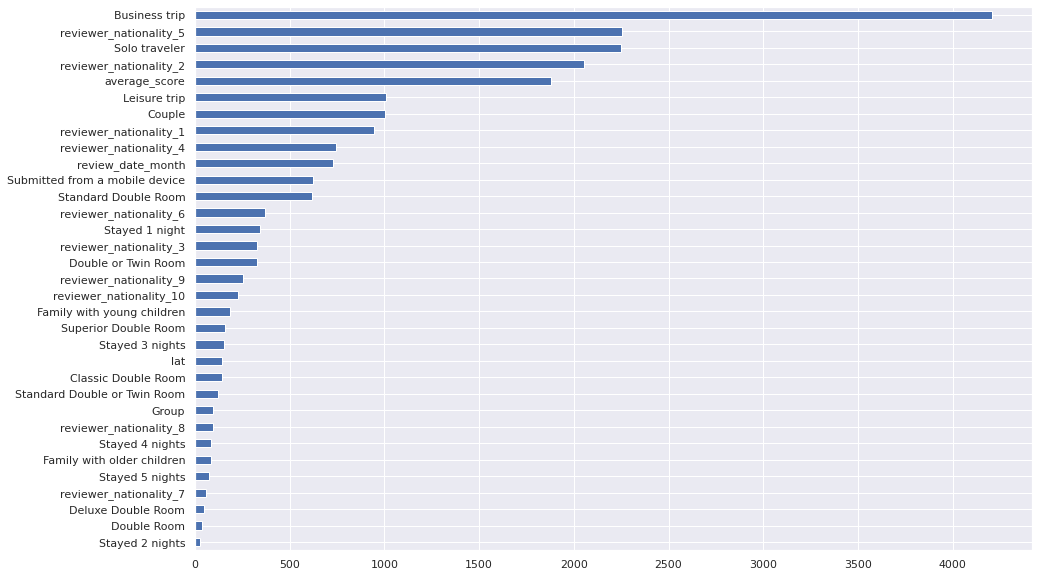

In [28]:

from sklearn.feature_selection import chi2 # хи-квадрат
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15,10)
imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot:>

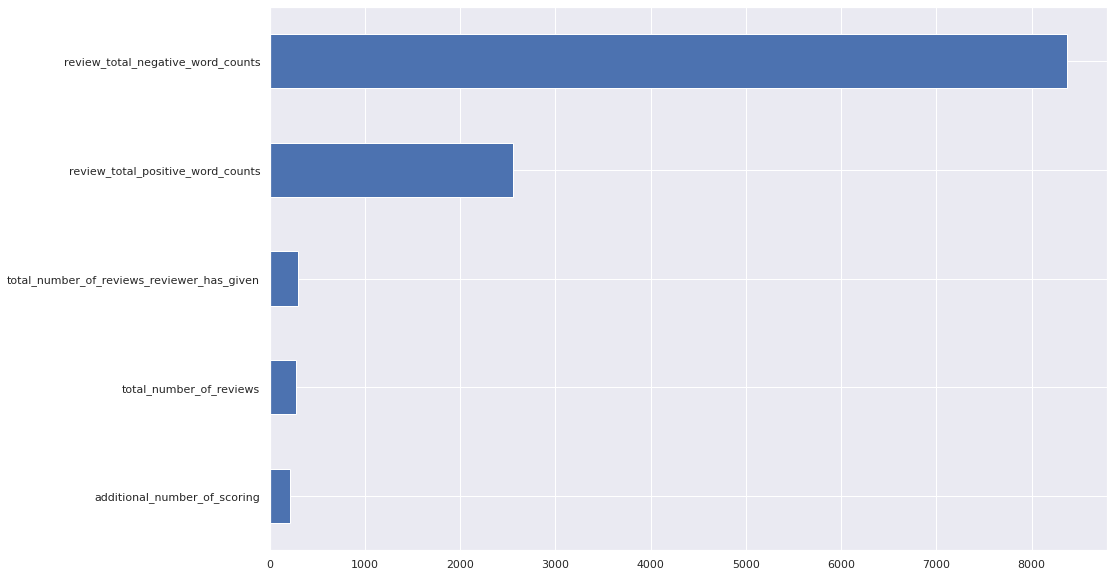

In [29]:
from sklearn.feature_selection import f_classif # anova

plt.rcParams['figure.figsize'] = (15,10)
imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

**Обучение модели**

In [30]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [31]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [33]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1595954116317144
